In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# Generate Data

In [4]:
X_train = np.linspace(-1, 1, 20)

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1, 1, 20)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

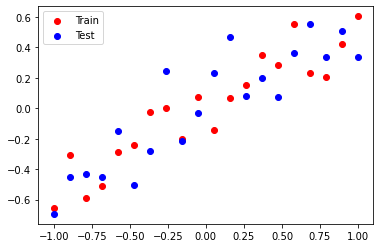

In [8]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [9]:
# Regression Model without Dropout

In [17]:
model = Sequential()
model.add(Dense(128,input_dim = 1, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(1,activation = "linear"))
adam = Adam(learning_rate = 0.01)
model.compile(loss = "mse",optimizer = adam, metrics = ['mse'])

history = model.fit(X_train,y_train, epochs = 300, validation_data = (X_test,y_test),verbose = False)

In [19]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004527154378592968, Test: 0.046030960977077484


In [ ]:
# there is large difference b/w train and test 

In [21]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 92ms/step


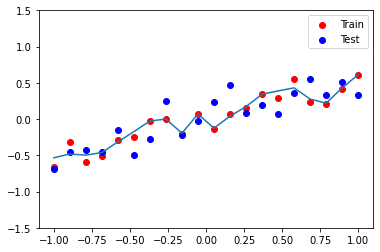

In [22]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

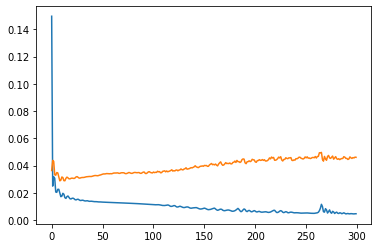

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

** Dropout **

In [36]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model_2.fit(X_train, y_train, epochs=300, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [26]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.013264769688248634, Test: 0.03827822953462601


In [27]:
# now we observe that there is minimal difference in the train and test data

In [28]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 53ms/step


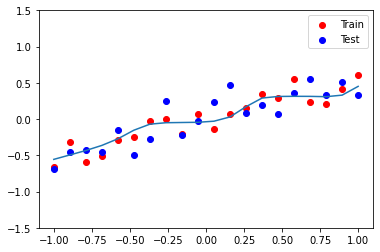

In [29]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

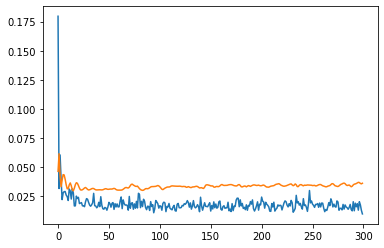

In [37]:
# now the line in more smooth 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [ ]:
# now as we compare with above graph so we notice the difference it show stable  